In [2]:
import matplotlib.pyplot as plt
import numpy as np
import serial

In [47]:
#---------------------------------------------------------------
# Reading data from Powerstar 10 card
#---------------------------------------------------------------

# Setup primary UART (miniUART) and read from Powerstar card
with serial.Serial("/dev/serial0", 115200, timeout=1) as ser:
    ser.flushInput # clear input serial buffer
    
    ser.write(b"-twh\r") # request headings for signals from Powerstar 10 card
    headings = [((x.strip()).strip(',')).split(',') for x in (((ser.read(1024)).strip()).strip('\r')).split('\r')] # read serial data in response to headings request. strip() necessary for any leading and trailing spaces in data
    print(headings)

    ser.write(b"-twrh\r"); ser.read(1024); # set to high resolution logging fadc = 10kHz
    # ser.write(b"-twrl\r"); ser.read(1024); # set to low resolution logging fadc = 1kHz

    ser.write(b"-tw\r") # request signals from Powerstar 10 card
    data = [((x.strip()).strip(',')).split(',') for x in (((ser.read(10000)).strip()).strip('\r')).split('\r')] # read serial data
    data = np.array(data[:-1]) # discard last list in data. Usually no complete.
    data = data.astype(np.float) # convert data array of strings to array of floats 
    data = np.transpose(data) # transpose data so that a list at each row is a buffer for a partricular measured quantity
    # print(data)

    src_v = data[0]/12 # source voltage
    src_i = data[2]/12 # source current

[['Src Volts SIG', 'Inv Volts SIG', 'Src Amps SIG', 'Inv Amps SIG', 'Src V d', 'Src V q'], [''], ['Cmd Ok']]


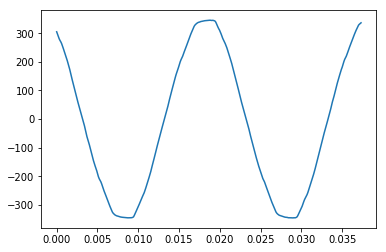

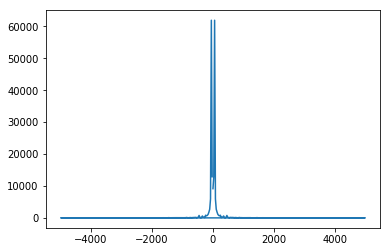

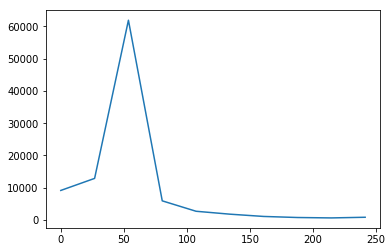

In [59]:
#---------------------------------------------------------------
# Performing FFT
#---------------------------------------------------------------

fadc = float(10000)                                 # sampling frequency of ADC. 1kHz for low resolution; 10kHz for high resolution.
nsamples = len(src_v)                               # number of samples
tlen = nsamples/fadc
trunc = 10

t = np.linspace(0,tlen,nsamples) # generate time axis for signal
plt.plot(t, src_v)

SRC_V = np.fft.fft(src_v) # perform FFT on source voltage
freq = np.fft.fftfreq(len(t), 1/fadc) # obtain frequency axis
plt.figure(); plt.plot(freq, abs(SRC_V))

plt.figure(); plt.plot(freq[:trunc], abs(SRC_V)[:trunc]) # zoom in
